In [1]:
# 3 Clustering and Dimensionality Reduction

In [2]:
# Task 4

In [3]:
import numpy as np
# Loads Data
file = open("breast+cancer+wisconsin+diagnostic/wdbc.data","r")
file_cont = file.read()
file.close()
lines = file_cont.split("\n")
# Removes last line which is just empty split
lines = lines[0:len(lines) - 1]
data = np.genfromtxt("breast+cancer+wisconsin+diagnostic/wdbc.data", delimiter=',')
# Generates X and Y
# Extracts features (removes ID and diagnosis)
X = data[:, 2:]
# Stores diagnosis labels
# 0 = Malignant. 1 = Benign
MALIGNANT = 0
BENIGN = 1
Y = [MALIGNANT if line.split(",")[1] == "M" else BENIGN for line in lines]

[0.98204467 0.01617649]


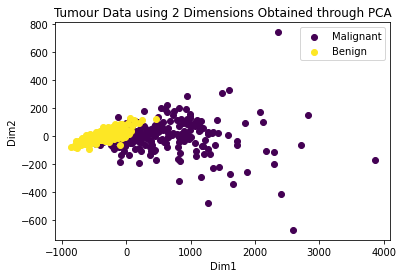

In [84]:
# Performs PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_reduce = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
#Plots PCA space
malig_reduced = [X_reduce[idx] for idx in range(len(X_reduce)) if Y[idx] == MALIGNANT]
benign_reduced = [X_reduce[idx] for idx in range(len(X_reduce)) if Y[idx] == BENIGN]
plt.scatter([m[0] for m in malig_reduced], [m[1] for m in malig_reduced], c=[[68/255, 1/255, 84/255]],
            label='Malignant')
plt.scatter([b[0] for b in benign_reduced], [b[1] for b in benign_reduced], c=[[253/255, 231/255, 37/255]], 
            label='Benign')
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.title("Tumour Data using 2 Dimensions Obtained through PCA")
plt.legend()

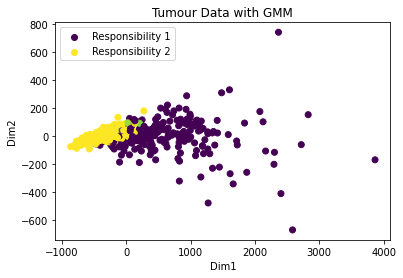

In [89]:
# Task 5
from sklearn.mixture import GaussianMixture
# Trains GMM
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X)
# Loops through data and calculates what percent of each distribution it's from. Sets colour accorrdingly
comp = gmm.predict_proba(X)
# Note that resp1 + resp 2 = 1 for all values here
plt.scatter([], [], c=[[68/255, 1/255, 84/255]], label='Responsibility 1')
plt.scatter([], [], c=[[253/255, 231/255, 37/255]], label='Responsibility 2')
plt.scatter([x[0] for x in X_reduce], [x[1] for x in X_reduce], c=comp[:,0])
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.title("Tumour Data with GMM")
plt.legend()
# If graph does not look like report, re run a few times till it does.
# This occurs as responsibility order is random

In [6]:
# Prints accuracy
preds = [np.argmax(c) for c in comp]
correct = sum([1 for idx in range(len(preds)) if (1 - preds[idx]) == Y[idx]])
accuracy = correct / len(preds)
# Assumes that GMM gets accuracy over 0.5
# This line is necessary as GMM randomly swaps order of 'malignant' and 'begign' responsiilities
# Task 6
if accuracy < 0.5: accuracy = 1 - accuracy
print("Accuracy", accuracy)

Accuracy 0.9507908611599297
